In [22]:
import pandas as pd
import datetime
import os

In [23]:
df_google = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")

In [24]:
df_google.head()

country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

         date  retail_and_recreation_percent_change_from_baseline  \
0  2020-02-15                                                0.0    
1  2020-02-16                                                1.0    
2  2020-02-17                                               -1.0    
3  2020-02-18                                               -2.0    
4  2020-02-19                                               -2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                                4.0   
2                                                1.0   
3                                                1.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                 5.0   
1                                 4.0   
2                                 5.0   
3                                 5.0   
4                                 4.0   

   transit_stations_percent_change_from_baseline  \
0                                            0.0   
1                                            1.0   
2                                            1.0   
3                                            0.0   
4                                           -1.0   

   workplaces_percent_change_from_baseline  \
0                                      2.0   
1                                      2.0   
2                                      2.0   
3                                      2.0   
4                                      2.0   

   residential_percent_change_from_baseline  
0                                       1.0  
1                                       1.0  
2                                       1.0  
3                                       1.0  
4                                       1.0

In [42]:
data = [['S12000033', 'Aberdeen City'],
  ['S12000034', 'Aberdeenshire'],
  ['S12000041', 'Angus Council'],
  ['S12000035', 'Argyll and Bute Council'],
  ['S12000036', 'Edinburgh'],
  ['S12000005', 'Clackmannanshire'],
  ['S12000006', 'Dumfries and Galloway'],
  ['S12000042', 'Dundee City Council'],
  ['S12000008', 'East Ayrshire Council'],
  ['S12000045', 'East Dunbartonshire Council'],
  ['S12000010', 'East Lothian Council'],
  ['S12000011', 'East Renfrewshire Council'],
  ['S12000014', 'Falkirk'],
  ['S12000015', 'Fife'],
  ['S12000046', 'Glasgow City'],
  ['S12000017', 'Highland Council'],
  ['S12000018', 'Inverclyde'],
  ['S12000019', 'Midlothian'],
  ['S12000020', 'Moray'],
  ['S12000013', 'Na h-Eileanan an Iar'],
  ['S12000021', 'North Ayrshire Council'],
  ['S12000044', 'North Lanarkshire'],
  ['S12000023', 'Orkney'],
  ['S12000024', 'Perth and Kinross'],
  ['S12000038', 'Renfrewshire'],
  ['S12000026', 'Scottish Borders'],
  ['S12000027', 'Shetland Islands'],
  ['S12000028', 'South Ayrshire Council'],
  ['S12000029', 'South Lanarkshire'],
  ['S12000030', 'Stirling'],
  ['S12000039', 'West Dunbartonshire Council'],
  ['S12000040', 'West Lothian']]

In [43]:
df_copy_sub_region = df.copy(deep=True)
df_copy_sub_region = df_copy_sub_region.set_index('sub_region_1')

NameError: name 'df' is not defined

In [27]:
df_copy_sub_region

NameError: name 'df_copy_sub_region' is not defined

In [28]:
df_copy_sub_region2 = df.copy(deep=True)

NameError: name 'df' is not defined

In [29]:
df_copy_sub_region3 = df_copy_sub_region2.set_index('sub_region_1', inplace = True) 

NameError: name 'df_copy_sub_region2' is not defined

In [30]:
df_copy_sub_region3

NameError: name 'df_copy_sub_region3' is not defined

In [31]:
df_copy_country = df.copy(deep=True)
df_copy_country = df_copy_country.set_index('country_region', inplace=True)

NameError: name 'df' is not defined

In [32]:
df_copy_country

NameError: name 'df_copy_country' is not defined

In [33]:
df_copy_country2 = df.copy(deep=True)
df_copy_country2.set_index('country_region', inplace=True)
df_copy_country3

NameError: name 'df' is not defined

In [34]:
def convert_date_to_day(date):
    date_list = date.split('-')
    date_num = list(map(int, date_list))
    a_date = datetime.date(date_num[0], date_num[1], date_num[2])
    day_of_year = (a_date - datetime.date(date_num[0], 1, 1)).days + 1
    return day_of_year

In [44]:
def get_lad_data(df_google, area_name):
    df_sub_region = df_google.copy()
    df_sub_region.set_index('sub_region_1', inplace=True)
    df_area = df_sub_region.loc[area_name, ['date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
    df_area.reset_index(inplace=True, drop=True)
    df_area['time'] = df_area['date'].apply(lambda x : convert_date_to_day(x))
    df_area = df_area.drop(columns=['date'])
    df_area = df_area.set_index('time')
    df_area = df_area.reset_index(inplace=False)
    df_area = df_area.set_index('time')
    #df_area = df_area.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'valueA', 'grocery_and_pharmacy_percent_change_from_baseline': 'valueB', 'parks_percent_change_from_baseline':'valueC', 'transit_stations_percent_change_from_baseline':'valueD', 'workplaces_percent_change_from_baseline':'valueE', 'residential_percent_change_from_baseline':'valueF'})
    return df_area[-60:]

In [45]:
df_aberdeen_example = get_lad_data(df_google, 'Aberdeen City')
df_aberdeen_example

retail_and_recreation_percent_change_from_baseline  \
time                                                       
78                                                -24.0    
79                                                -28.0    
80                                                -35.0    
81                                                -57.0    
82                                                -60.0    
83                                                -53.0    
84                                                -75.0    
85                                                -78.0    
86                                                -80.0    
87                                                -80.0    
88                                                -87.0    
89                                                -86.0    
90                                                -77.0    
91                                                -79.0    
92                                                -79.0    
93                                                -81.0    
94                                                -80.0    
95                                                -86.0    
96                                                -84.0    
97                                                -78.0    
98                                                -79.0    
99                                                -80.0    
100                                               -80.0    
101                                               -80.0    
102                                               -85.0    
103                                               -87.0    
104                                               -82.0    
105                                               -79.0    
106                                               -78.0    
107                                               -80.0    
108                                               -80.0    
109                                               -86.0    
110                                               -84.0    
111                                               -78.0    
112                                               -79.0    
113                                               -80.0    
114                                               -81.0    
115                                               -81.0    
116                                               -85.0    
117                                               -84.0    
118                                               -80.0    
119                                               -80.0    
120                                               -80.0    
121                                               -79.0    
122                                               -79.0    
123                                               -84.0    
124                                               -81.0    
125                                               -75.0    
126                                               -77.0    
127                                               -76.0    
128                                               -77.0    
129                                               -79.0    
130                                               -84.0    
131                                               -82.0    
132                                               -74.0    
133                                               -78.0    
134                                               -78.0    
135                                               -76.0    
136                                               -77.0    
137                                               -81.0    

      grocery_and_pharmacy_percent_change_from_baseline  \
time                                                      
78                                                 19.0   
79                                                 20.0   
80                                               

In [46]:
"As input give the new dataframe with country region as index"
def get_uk_average(df_google):
    df_country = df_google.copy()
    df_country.set_index('country_region', inplace=True)
    df_area = df_country.loc['United Kingdom', ['date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
    df_area.reset_index(inplace=True, drop=True)
    df_area['time'] = df_area['date'].apply(lambda x : convert_date_to_day(x))
    df_area = df_area.drop(columns=['date'])
    df_area = df_area.set_index('time')
    df_area = df_area.reset_index(inplace=False)
    df_area = df_area.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'uk_retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline': 'uk_grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline':'uk_parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline':'uk_transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline':'uk_workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline':'uk_residential_percent_change_from_baseline'})    
    df_area = df_area.set_index('time')
    return df_area[-60:]

In [47]:
df_uk = get_uk_average(df_google)
df_uk.head()

uk_retail_and_recreation_percent_change_from_baseline  \
time                                                          
78                                                -24.0       
79                                                -23.0       
80                                                -37.0       
81                                                -60.0       
82                                                -68.0       

      uk_grocery_and_pharmacy_percent_change_from_baseline  \
time                                                         
78                                                 16.0      
79                                                 17.0      
80                                                  5.0      
81                                                 -9.0      
82                                                -19.0      

      uk_parks_percent_change_from_baseline  \
time                                          
78                                    -25.0   
79                                     -4.0   
80                                    -24.0   
81                                    -49.0   
82                                    -27.0   

      uk_transit_stations_percent_change_from_baseline  \
time                                                     
78                                               -46.0   
79                                               -48.0   
80                                               -48.0   
81                                               -62.0   
82                                               -61.0   

      uk_workplaces_percent_change_from_baseline  \
time                                               
78                                         -28.0   
79                                         -33.0   
80                                         -34.0   
81                                         -32.0   
82                                         -38.0   

      uk_residential_percent_change_from_baseline  
time                                               
78                                           11.0  
79                                           12.0  
80                                           13.0  
81                                           11.0  
82                                            NaN

In [48]:
def combine_uk_average(df_sub_region, df_uk):
    result = pd.concat([df_sub_region, df_uk], axis=1)
    result = result.reset_index()
    return result

In [49]:
def populate_all_google_data(df_google, regions, root_path):
    
    for x in data:
        df_sub_region = get_lad_data(df_google, x[1])
        df_uk = get_uk_average(df_google)
        df_result = combine_uk_average(df_sub_region, df_uk)
        path = root_path + f"{x[0]}.csv"
        print(path)
        current_dir = os.getcwd()
        curr = os.path.dirname(os.getcwd())
        #print(curr)
        df_result.to_csv(current_dir + path)

In [50]:
populate_all_google_data(df_google, data, '/data/g_mobility/')

/data/g_mobility/S12000033.csv
/data/g_mobility/S12000034.csv
/data/g_mobility/S12000041.csv
/data/g_mobility/S12000035.csv
/data/g_mobility/S12000036.csv
/data/g_mobility/S12000005.csv
/data/g_mobility/S12000006.csv
/data/g_mobility/S12000042.csv
/data/g_mobility/S12000008.csv
/data/g_mobility/S12000045.csv
/data/g_mobility/S12000010.csv
/data/g_mobility/S12000011.csv
/data/g_mobility/S12000014.csv
/data/g_mobility/S12000015.csv
/data/g_mobility/S12000046.csv
/data/g_mobility/S12000017.csv
/data/g_mobility/S12000018.csv
/data/g_mobility/S12000019.csv
/data/g_mobility/S12000020.csv
/data/g_mobility/S12000013.csv
/data/g_mobility/S12000021.csv
/data/g_mobility/S12000044.csv
/data/g_mobility/S12000023.csv
/data/g_mobility/S12000024.csv
/data/g_mobility/S12000038.csv
/data/g_mobility/S12000026.csv
/data/g_mobility/S12000027.csv
/data/g_mobility/S12000028.csv
/data/g_mobility/S12000029.csv
/data/g_mobility/S12000030.csv
/data/g_mobility/S12000039.csv
/data/g_mobility/S12000040.csv


In [82]:
df_result = combine_uk_average(df_aberdeen_example, df_uk)
df_result.head()

time  retail_and_recreation_percent_change_from_baseline  \
0    64                                                5.0    
1    65                                               -1.0    
2    66                                                0.0    
3    67                                               -2.0    
4    68                                                1.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                6.0   
1                                                5.0   
2                                                2.0   
3                                                2.0   
4                                                5.0   

   parks_percent_change_from_baseline  \
0                                10.0   
1                                20.0   
2                                 4.0   
3                               -15.0   
4                                21.0   

   transit_stations_percent_change_from_baseline  \
0                                            1.0   
1                                            2.0   
2                                            2.0   
3                                            3.0   
4                                           10.0   

   workplaces_percent_change_from_baseline  \
0                                      1.0   
1                                      2.0   
2                                      1.0   
3                                      1.0   
4                                      0.0   

   residential_percent_change_from_baseline  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                      -1.0   

   uk_retail_and_recreation_percent_change_from_baseline  \
0                                                5.0       
1                                                5.0       
2                                                1.0       
3                                                1.0       
4                                                4.0       

   uk_grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0      
1                                                3.0      
2                                                5.0      
3                                                0.0      
4                                                3.0      

   uk_parks_percent_change_from_baseline  \
0                                   -1.0   
1                                    7.0   
2                                    3.0   
3                                    2.0   
4                                  -10.0   

   uk_transit_stations_percent_change_from_baseline  \
0                                              -1.0   
1                                               1.0   
2                                              10.0   
3                                              15.0   
4                                              12.0   

   uk_workplaces_percent_change_from_baseline  \
0                                        -1.0   
1                                        -2.0   
2                                        -2.0   
3                                         1.0   
4                                         1.0   

   uk_residential_percent_change_from_baseline  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                         -1.0  
4                                         -1.0

In [79]:
df_result.to_csv('google_comparison_uk2.csv')

In [14]:
def get_all_data(df, regions, root_path):
    
    for x in data:
        print(x[1])
        df_area = get_lad_data(df, x[1])
        
        path = root_path + f"{x[0]}.csv"
        print(path)
        current_dir = os.getcwd()
        curr = os.path.dirname(os.getcwd())
        #print(curr)
        df_area.to_csv(current_dir + path)

In [15]:
get_all_data(df, data, '/data/google_mobility/')

NameError: name 'df' is not defined

In [16]:
df_test = get_lad_data(df, 'Orkney')

NameError: name 'df' is not defined

In [17]:
df_test

NameError: name 'df_test' is not defined

In [40]:
df_test.to_csv('test_mult2.csv')

In [39]:
df_test = df_test.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'valueA', 'grocery_and_pharmacy_percent_change_from_baseline': 'valueB', 'parks_percent_change_from_baseline':'valueC', 'transit_stations_percent_change_from_baseline':'valueD', 'workplaces_percent_change_from_baseline':'valueE', 'residential_percent_change_from_baseline':'valueF'})

In [41]:
df_test

time  valueA  valueB  valueC  valueD  valueE  valueF
18    64     5.0     6.0    10.0     1.0     1.0     0.0
19    65    -1.0     5.0    20.0     2.0     2.0     0.0
20    66     0.0     2.0     4.0     2.0     1.0     0.0
21    67    -2.0     2.0   -15.0     3.0     1.0     0.0
22    68     1.0     5.0    21.0    10.0     0.0    -1.0
23    69     3.0     2.0    -2.0     1.0     0.0     1.0
24    70     3.0     5.0    14.0     3.0     1.0     0.0
25    71     0.0     4.0    -8.0    -4.0     0.0     1.0
26    72    -5.0     9.0    -7.0    -8.0     0.0     1.0
27    73    -4.0     9.0    -8.0    -7.0    -2.0     1.0
28    74   -13.0     8.0   -34.0   -11.0    -2.0     3.0
29    75    -8.0     5.0   -22.0    -4.0    -4.0     1.0
30    76    -6.0    17.0   -14.0   -16.0    -9.0     4.0
31    77   -18.0    17.0   -10.0   -25.0   -16.0     7.0
32    78   -24.0    19.0    -4.0   -28.0   -24.0    10.0
33    79   -28.0    20.0     1.0   -32.0   -29.0    12.0
34    80   -35.0     7.0    -9.0   -34.0   -31.0    13.0
35    81   -57.0     1.0   -12.0   -44.0   -26.0    11.0
36    82   -60.0   -15.0    -6.0   -44.0   -32.0     8.0
37    83   -53.0   -14.0   -32.0   -51.0   -48.0    18.0
38    84   -75.0   -26.0   -30.0   -59.0   -61.0    24.0
39    85   -78.0   -26.0   -25.0   -63.0   -67.0    27.0
40    86   -80.0   -28.0   -16.0   -67.0   -69.0    28.0
41    87   -80.0   -28.0   -28.0   -69.0   -69.0    30.0
42    88   -87.0   -36.0   -55.0   -73.0   -60.0     NaN
43    89   -86.0   -41.0   -46.0   -73.0   -58.0     NaN
44    90   -77.0   -32.0   -15.0   -68.0   -70.0    27.0
45    91   -79.0   -30.0   -30.0   -68.0   -71.0    28.0
46    92   -79.0   -30.0   -27.0   -68.0   -70.0    29.0
47    93   -81.0   -33.0   -33.0   -72.0   -71.0    30.0
48    94   -80.0   -29.0   -33.0   -70.0   -70.0    30.0
49    95   -86.0   -31.0   -30.0   -71.0   -60.0     NaN
50    96   -84.0   -37.0   -39.0   -71.0   -57.0     NaN
51    97   -78.0   -30.0   -20.0   -69.0   -71.0    28.0
52    98   -79.0   -30.0    -9.0   -65.0   -71.0    28.0
53    99   -80.0   -32.0   -32.0   -67.0   -71.0    29.0
54   100   -80.0   -24.0   -19.0   -67.0   -72.0    29.0
55   101   -80.0   -25.0   -28.0   -68.0   -73.0    30.0
56   102   -85.0   -25.0    -2.0   -64.0   -61.0     NaN
57   103   -87.0   -42.0   -46.0   -72.0   -58.0     NaN
58   104   -82.0   -38.0   -20.0   -72.0   -76.0    30.0
59   105   -79.0   -29.0    -9.0   -64.0   -71.0    28.0
60   106   -78.0   -27.0     9.0   -65.0   -71.0    28.0
61   107   -80.0   -29.0   -16.0   -66.0   -71.0    29.0
62   108   -80.0   -27.0    -6.0   -67.0   -71.0    30.0
63   109   -86.0   -29.0    -4.0   -68.0   -58.0     NaN
64   110   -84.0   -33.0    12.0   -65.0   -54.0     NaN
65   111   -78.0   -31.0    32.0   -65.0   -70.0    27.0
66   112   -79.0   -29.0    33.0   -65.0   -69.0    27.0
67   113   -80.0   -30.0    15.0   -67.0   -69.0    28.0
68   114   -81.0   -26.0    42.0   -66.0   -69.0    28.0
69   115   -81.0   -27.0    -7.0   -70.0   -68.0    29.0
70   116   -85.0   -27.0    -7.0   -69.0   -56.0     NaN
71   117   -84.0   -34.0   -28.0   -70.0   -55.0     NaN
72   118   -80.0   -32.0   -13.0   -68.0   -69.0    27.0
73   119   -80.0   -29.0     8.0   -65.0   -69.0    25.0
74   120   -80.0   -29.0    10.0   -64.0   -68.0    28.0
75   121   -79.0   -27.0     1.0   -68.0   -69.0    29.0
76   122   -79.0   -27.0     5.0   -67.0   -68.0    28.0
77   123   -84.0   -26.0   -18.0   -68.0   -56.0     NaN

In [18]:
convert_date_to_day(df_test['date'][1])

47

In [9]:
df_aberdeen2 = df.loc['Stirling', ["date", 'workplaces_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline']]

In [10]:
df_aberdeen2

date  workplaces_percent_change_from_baseline  \
sub_region_1                                                        
Stirling      2020-02-15                                      1.0   
Stirling      2020-02-16                                      0.0   
Stirling      2020-02-17                                    -19.0   
Stirling      2020-02-18                                    -17.0   
Stirling      2020-02-19                                    -18.0   
...                  ...                                      ...   
Stirling      2020-04-28                                    -72.0   
Stirling      2020-04-29                                    -72.0   
Stirling      2020-04-30                                    -72.0   
Stirling      2020-05-01                                    -71.0   
Stirling      2020-05-02                                    -51.0   

              retail_and_recreation_percent_change_from_baseline  \
sub_region_1                                                       
Stirling                                                  -11.0    
Stirling                                                   -6.0    
Stirling                                                    9.0    
Stirling                                                   11.0    
Stirling                                                   10.0    
...                                                         ...    
Stirling                                                  -73.0    
Stirling                                                  -75.0    
Stirling                                                  -75.0    
Stirling                                                  -76.0    
Stirling                                                  -82.0    

              parks_percent_change_from_baseline  
sub_region_1                                      
Stirling                                   -42.0  
Stirling                                   -13.0  
Stirling                                    15.0  
Stirling                                    21.0  
Stirling                                    17.0  
...                                          ...  
Stirling                                   -25.0  
Stirling                                   -48.0  
Stirling                                   -44.0  
Stirling                                   -37.0  
Stirling                                   -41.0  

[78 rows x 4 columns]

In [12]:
df_aberdeen2 = df_aberdeen.set_index('date')

<Figure size 432x288 with 0 Axes>

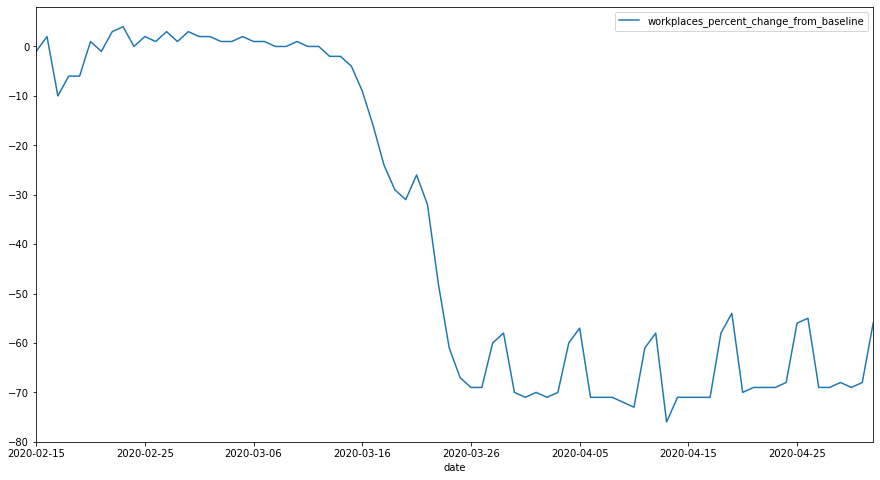

In [13]:
import matplotlib.pyplot as plt
plt.figure()
df_aberdeen.plot(figsize=(15,8))

In [24]:
df_aberdeen.reset_index(inplace=True)

In [25]:
df_aberdeen

date  workplaces_percent_change_from_baseline
0   2020-02-15                                     -1.0
1   2020-02-16                                      2.0
2   2020-02-17                                    -10.0
3   2020-02-18                                     -6.0
4   2020-02-19                                     -6.0
..         ...                                      ...
73  2020-04-28                                    -69.0
74  2020-04-29                                    -68.0
75  2020-04-30                                    -69.0
76  2020-05-01                                    -68.0
77  2020-05-02                                    -56.0

[78 rows x 2 columns]

In [40]:
df_aberdeen.to_csv('google_graph3.csv')

In [39]:
df_aberdeen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
date     78 non-null object
value    78 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [38]:
df_aberdeen

date  value
0   2020-02-15   -1.0
1   2020-02-16    2.0
2   2020-02-17  -10.0
3   2020-02-18   -6.0
4   2020-02-19   -6.0
..         ...    ...
73  2020-04-28  -69.0
74  2020-04-29  -68.0
75  2020-04-30  -69.0
76  2020-05-01  -68.0
77  2020-05-02  -56.0

[78 rows x 2 columns]

In [37]:
df_aberdeen = df_aberdeen.rename(columns={'workplaces_percent_change_from_baseline': 'value'})

In [18]:
df_bitcoin = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered_comma.csv")

In [19]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 2 columns):
date     1822 non-null object
value    1822 non-null float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [22]:
df_bitcoin

date    value
0     2013-04-28   135.98
1     2013-04-29   147.49
2     2013-04-30   146.93
3     2013-05-01   139.89
4     2013-05-02   125.60
...          ...      ...
1817  2018-04-19  8298.69
1818  2018-04-20  8880.23
1819  2018-04-21  8997.57
1820  2018-04-22  9001.64
1821  2018-04-23  8958.55

[1822 rows x 2 columns]

In [64]:
df_aberdeen2.reset_index(inplace=True, drop=True)
df_aberdeen2 = df_aberdeen2.drop('sub_region_1', 1)

KeyError: "['sub_region_1'] not found in axis"

In [75]:
df_aberdeen2 = df_aberdeen2.rename(columns={"date":"time", "workplaces_percent_change_from_baseline":"valueA", "retail_and_recreation_percent_change_from_baseline":"valueB", "parks_percent_change_from_baseline":"valueC"})

In [80]:
df_aberdeen2.head().set_index('time')

valueA  valueB  valueC
time                              
2020-02-15    -1.0    -3.0   -32.0
2020-02-16     2.0     6.0   -13.0
2020-02-17   -10.0    11.0    24.0
2020-02-18    -6.0     5.0    26.0
2020-02-19    -6.0     2.0     9.0

In [89]:
df_aberdeen2['time'] = pd.to_datetime(df_aberdeen2['time']).dt.strftime("%Y%m%d")
df_aberdeen2['time'] = df_aberdeen2['time'].astype(int)

In [91]:
df_aberdeen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
time      78 non-null int64
valueA    78 non-null float64
valueB    78 non-null float64
valueC    78 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.6 KB


In [92]:
df_aberdeen2.to_csv('google_graph_multiple5.csv')

In [94]:
df_aberdeen2

time  valueA  valueB  valueC
0   20200215    -1.0    -3.0   -32.0
1   20200216     2.0     6.0   -13.0
2   20200217   -10.0    11.0    24.0
3   20200218    -6.0     5.0    26.0
4   20200219    -6.0     2.0     9.0
..       ...     ...     ...     ...
73  20200428   -69.0   -80.0     8.0
74  20200429   -68.0   -80.0    10.0
75  20200430   -69.0   -79.0     1.0
76  20200501   -68.0   -79.0     5.0
77  20200502   -56.0   -84.0   -18.0

[78 rows x 4 columns]

In [72]:
df_ex = pd.read_csv("https://raw.githubusercontent.com/holtzy/D3-graph-gallery/master/DATA/data_connectedscatter.csv")

In [73]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
time      10 non-null int64
valueA    10 non-null int64
valueB    10 non-null int64
valueC    10 non-null int64
dtypes: int64(4)
memory usage: 448.0 bytes
